author : 
> Nabiel Husein Shihab / nabielshihab@hotmail.com

## **Estimating Magnitude of Completeness and b-value Automatically**
***

<div class="alert alert-block alert-warning">
<b>Flowchart</b>
</div>


# <img src="Figures/Picture_auto.png" width="900"/>

***

## I. Importing functions from other modules in library folder.

In [1]:
from library.curve_fitting_method import *
from library.visualization import *
from library.mag_of_completeness import *

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## II. Reading a catalog file from dataset folder

In [2]:
file_name = 'dataset\\Magnitude_Catalog.csv'
catalog = pd.read_csv(file_name)

print(f"number of catalog rows    : {catalog.shape[0]}")
print(f"number of catalog columns : {catalog.shape[1]}")
catalog.head()

number of catalog rows    : 1193
number of catalog columns : 4


,X,Y,Z,M
0,128.263141,-3.592250,-9.398,3.263406
1,128.379281,-3.619712,-9.167,4.357416
2,128.356440,-3.467614,-12.305,2.573589
3,128.351284,-3.615661,-11.570,2.970120
4,128.357585,-3.619155,-10.153,2.966920


## III. Calculating Mc and maxmag for b-value calculation and plotting the frequency-magnitude distribution (FMD)

Mc estimation method options:
>1. `maximum curvature (maxc)`
2. `goodness-of-fit test (gft)`
3. `Mc by b-value stability (mbs)`

Maximum magnitude estimation method :
>`maxmag = 𝑋𝑚𝑎𝑥1 + (𝑋𝑚𝑎𝑥1 – 𝑋𝑚𝑎𝑥2)`

>where :
maxmag = maximum magnitude,
Xmax1 = the biggest magnitude,
Xmax2 = the second biggest magnitude 

Sources: 
1. Mignan, A. dan Woessner, J. (2012): Estimating The Magnitude of completeness in Earthquake Catalogs. Community Online Resource for Statistical Seismicity Analysis. 
2. Kijko, A. dan Funk, C. W. (1994): The Assesment of Seismic Hazard in Mines. The Journal of the South African Institute of Mining and Metallurgy.

Magnitude of Completeness : 2.6
Maximum magnitude : 5.4


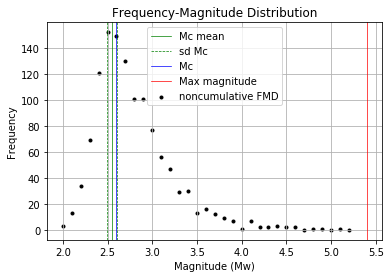

In [3]:
# magnitude of completeness estimation method
mc_method       = 'maxc'

# calculating Mc & maxmag
mag             = catalog['M']
fmd_data        = fmd_details(mag, mc_method)
mc              = fmd_data['mc']
maxmag          = fmd_data['maxmag']

print(f"Magnitude of Completeness : {mc}")
print(f"Maximum magnitude : {maxmag}")

# plotting FMD, Mc, maxmag
plot_noncum_fmd(fmd_data)

## IV. Calculating b-value, its uncertainty, and its 95% confidence interval

Curve fitting method options:
>1. `LM with Gaussian residual (b-value glog)`
2. `GLM with Gaussian residual (b-value glin)`
3. `GLM with Poisson residual (b-value pois)`

Source :
1. Naylor, M., Greenhough, J., McCloskey, J., Bell, A. F., dan Main, I. G. (2009): Statistical evaluation of characteristic earthquakes in the frequency magnitudo distributions of Sumatra and other subduction zone regions, Geophysical Research Letters, 36.

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


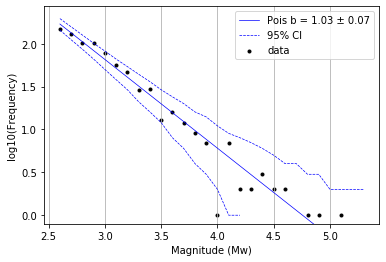

In [4]:
# curve fitting method
cv_method    = 'b-value pois'

# b-value and its uncertainty calculation
cv_data     = generate_autobvalue(cv_method, fmd_data)
bvalue      = cv_data['bvalue']
sd_bvalue   = cv_data['unc']

# plotting b-value and its 95% of confidence interval
plot_bvalue(cv_data, cv_method)